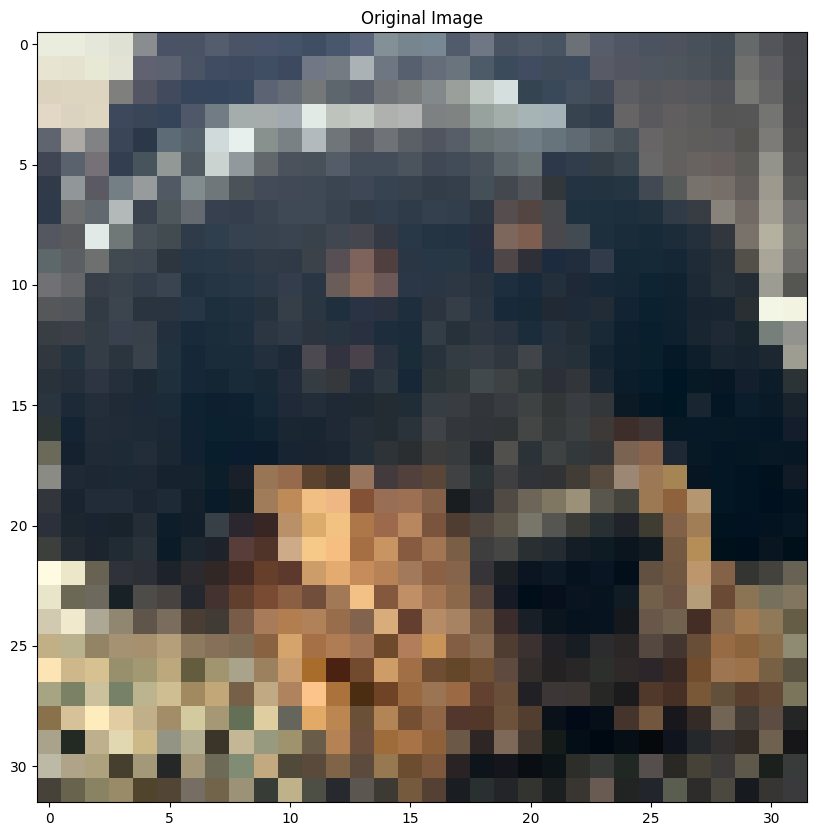

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)          │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

model.summary()=None
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 690ms/step


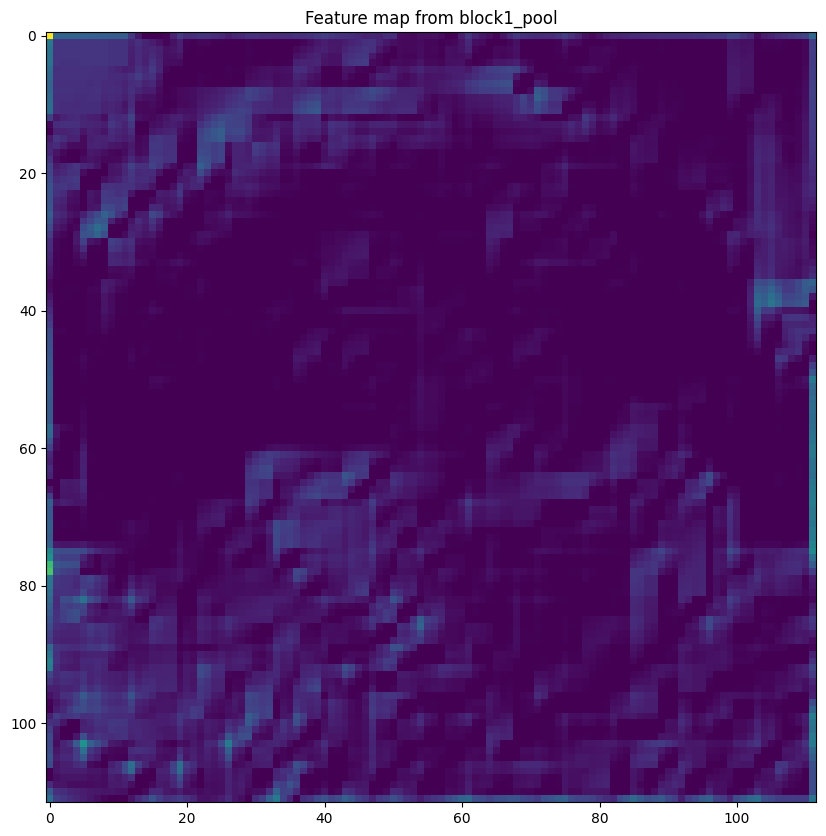

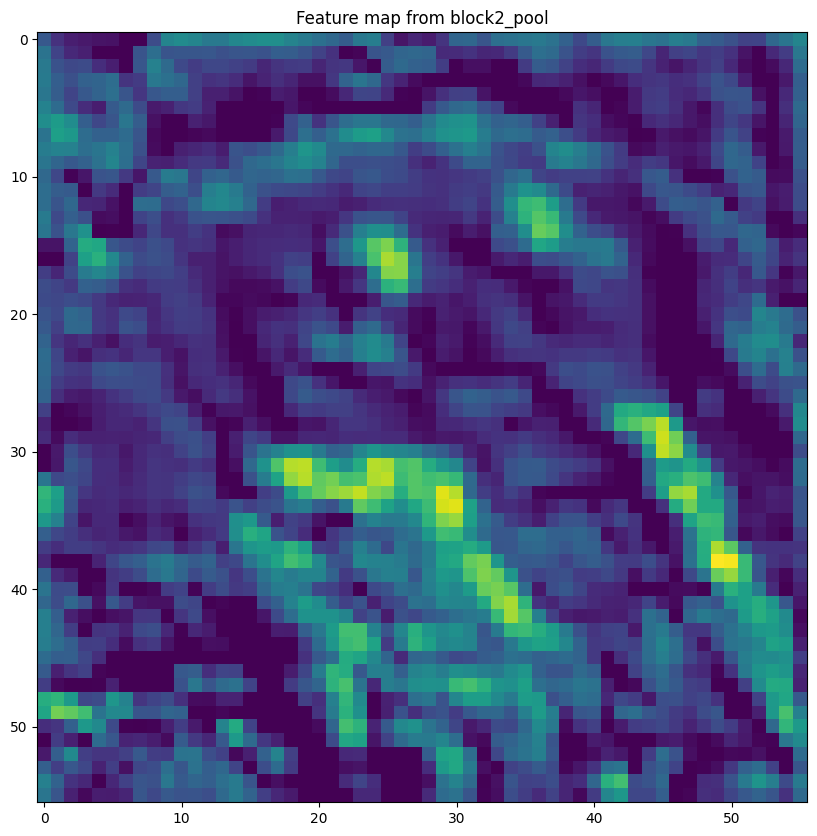

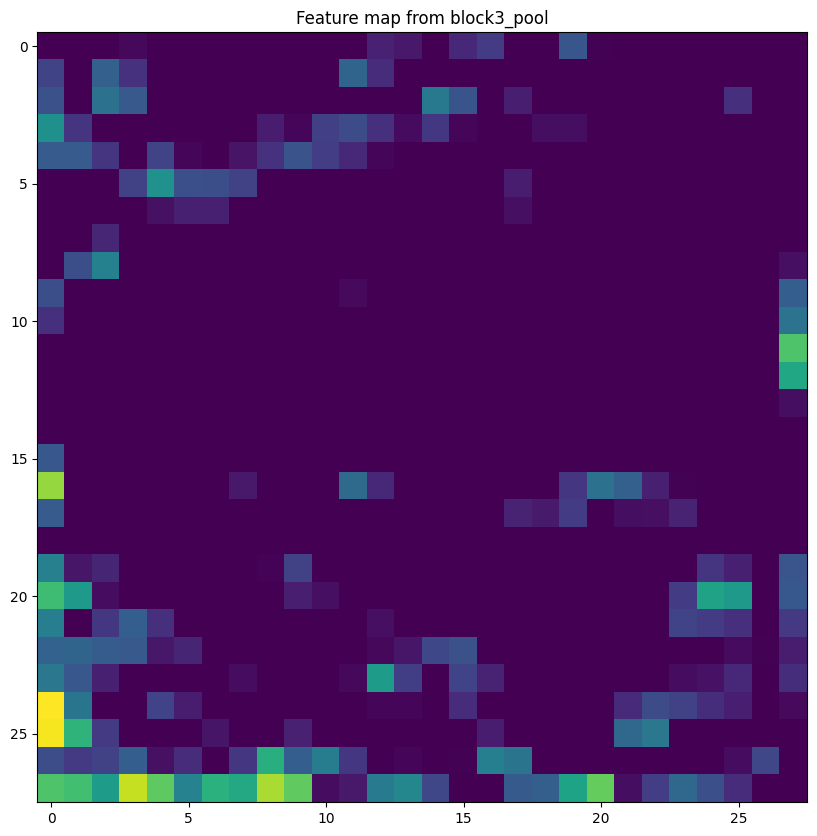

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from sklearn.decomposition import PCA

def show_image(img: np.ndarray, title="Image"):
  plt.figure(figsize=(10, 10))
  plt.imshow(img)
  plt.title(title)
  plt.show()

def preprocess_image(image, label=''):
    image = tf.image.resize(image, (224, 224))
    image = preprocess_input(image)
    return image, label

# Загрузка изображения
img_path = 'img3.jpg'
img = image.load_img(img_path, target_size=(32, 32))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_image(img_data)[0]

show_image(img, 'Original Image')

# Загрузка модели VGG16
model = VGG16(
    include_top=False,
    weights='imagenet',
    classes=1000,
    classifier_activation="softmax"
)

print(f'{model.summary()=}')

# Получение выходов с нужных слоев
layer_names = ['block1_pool', 'block2_pool', 'block3_pool']
outputs = [model.get_layer(name).output for name in layer_names]
feature_extraction_model = tf.keras.Model(inputs=model.input, outputs=outputs)

# Применение свертки
features = feature_extraction_model.predict(img_data)

# Визуализация результатов
for i, feature in enumerate(features):
    plt.figure(figsize=(10, 10))
    plt.imshow(feature[0, :, :, 0], cmap='viridis') # Отображаем первый канал
    # cmap: "plasma, inferno, gray"
    plt.title(f'Feature map from {layer_names[i]}')
    plt.show()

info: The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.


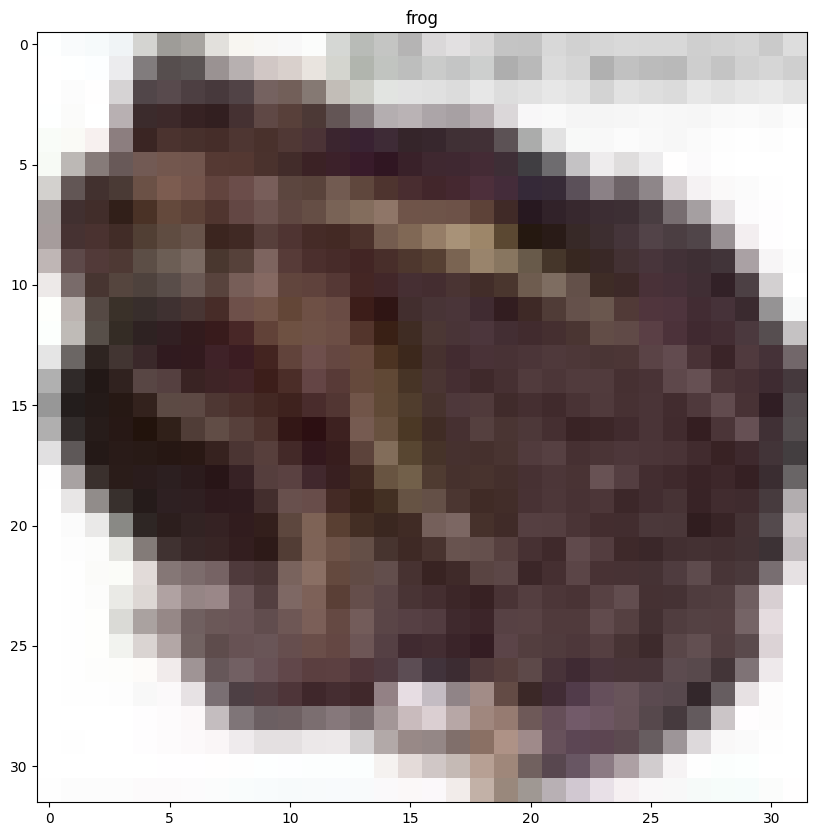

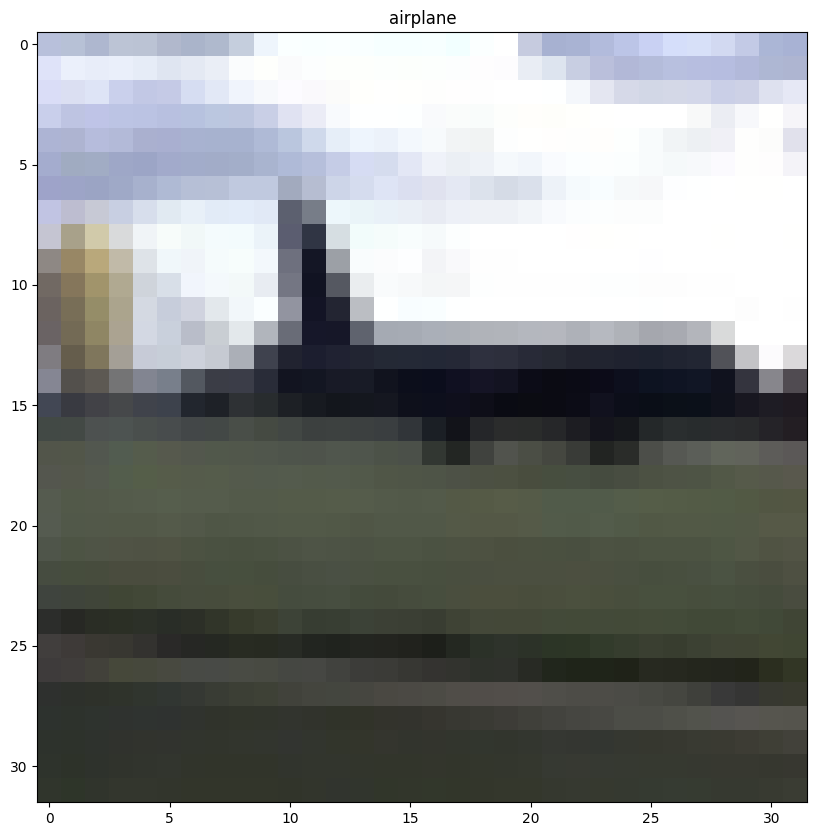

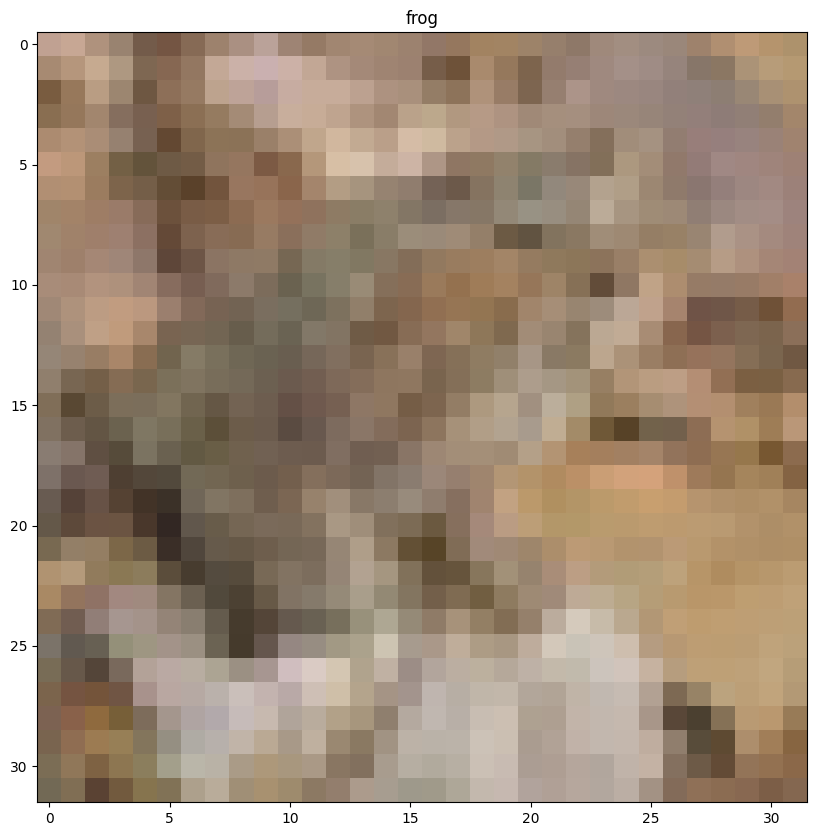

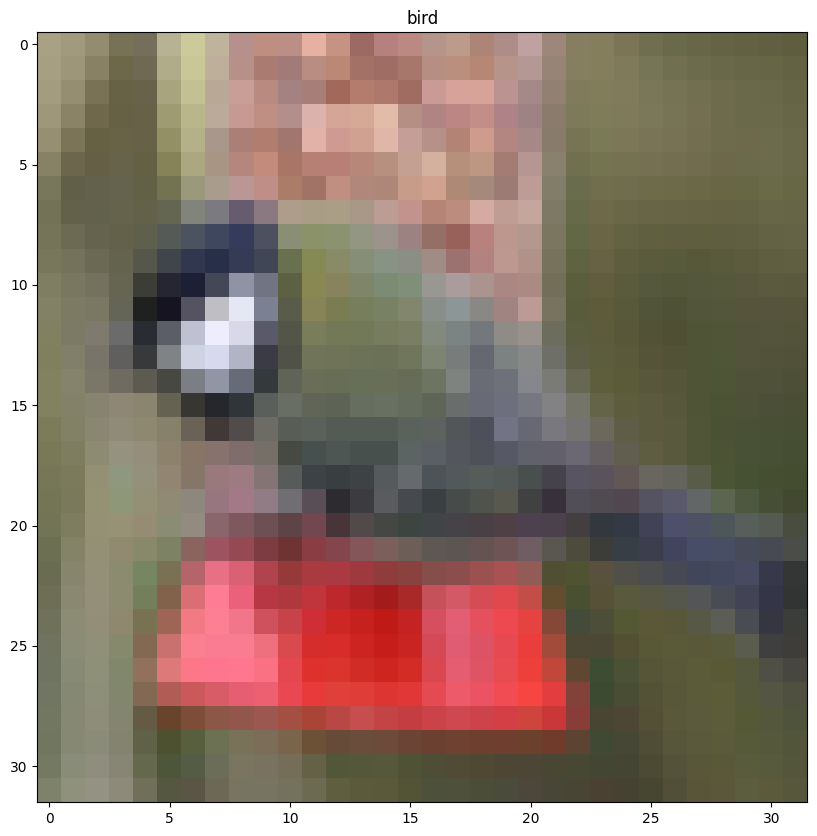

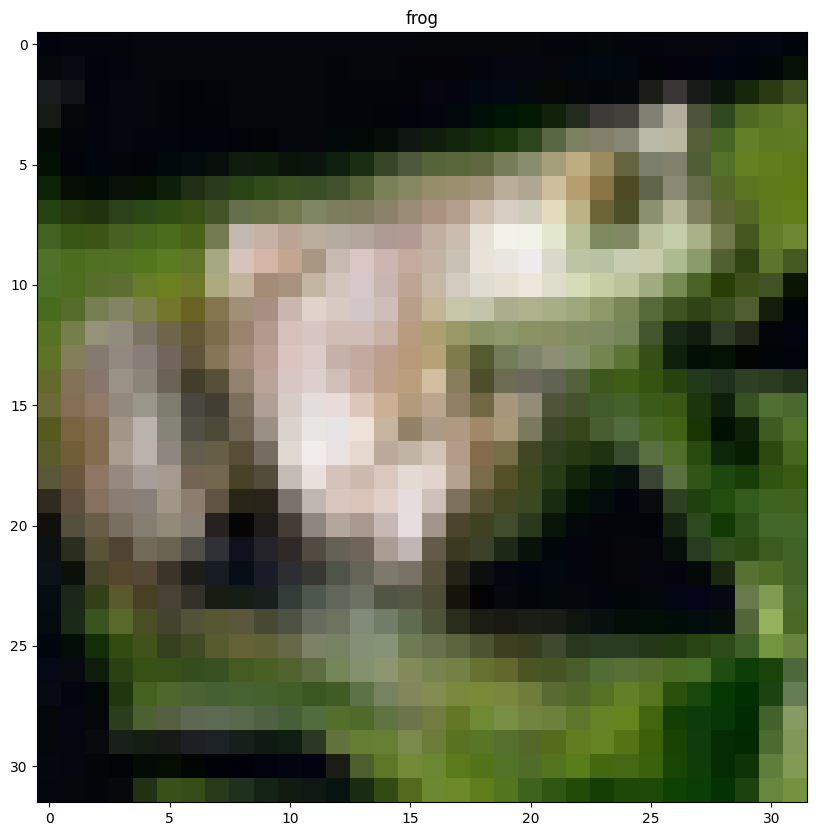

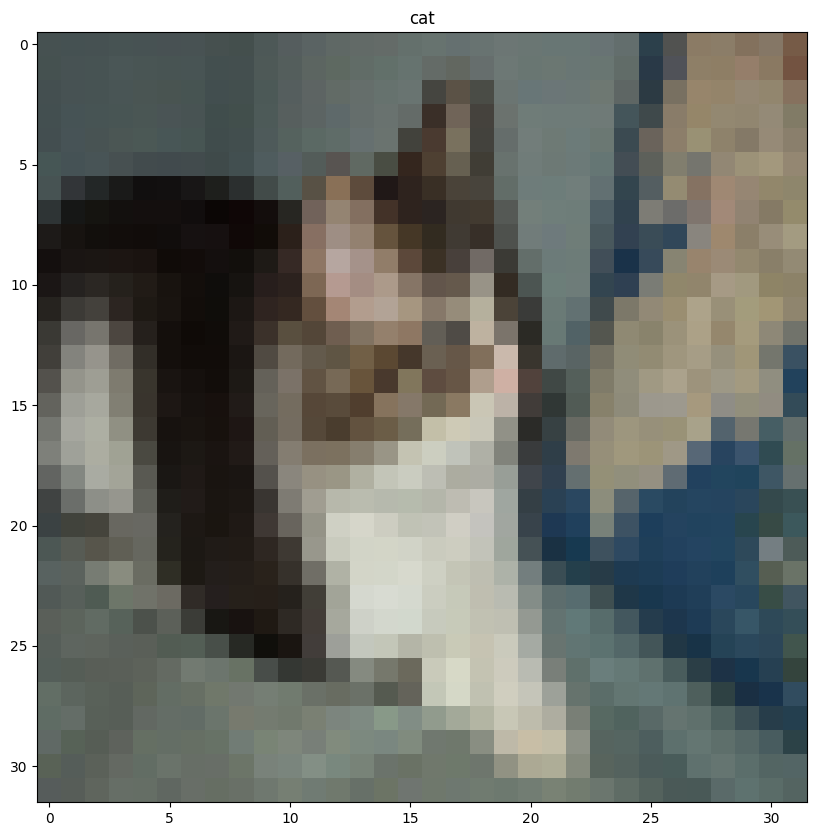

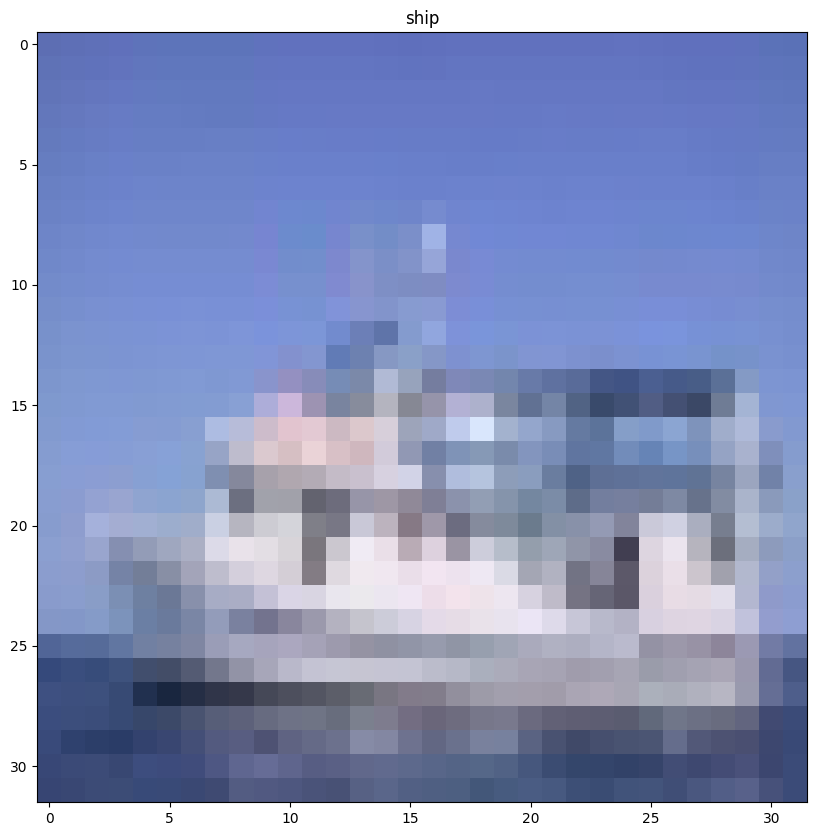

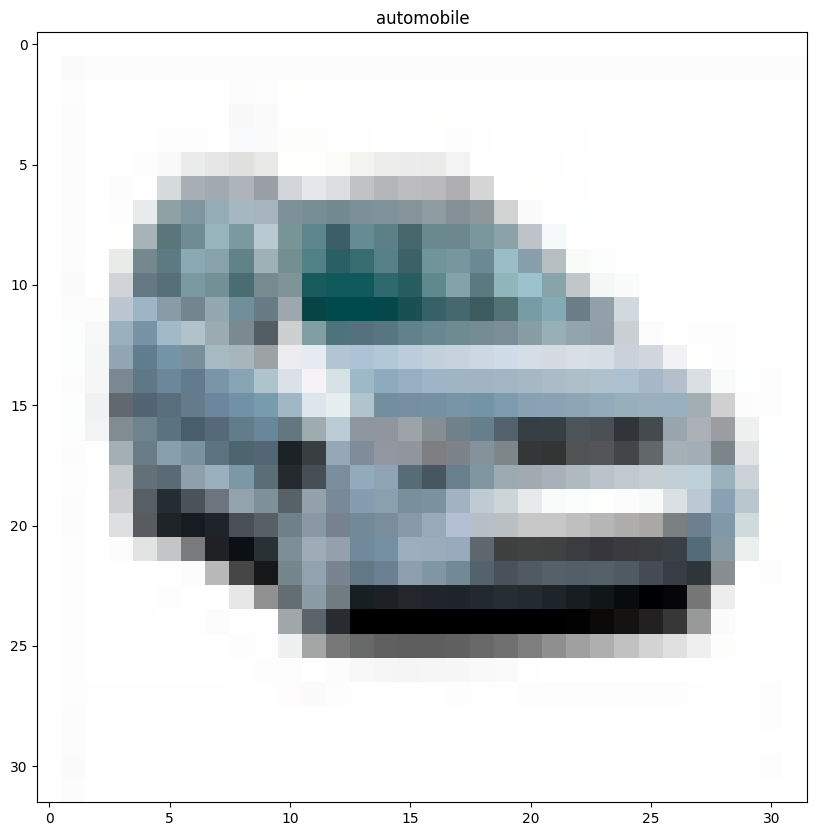

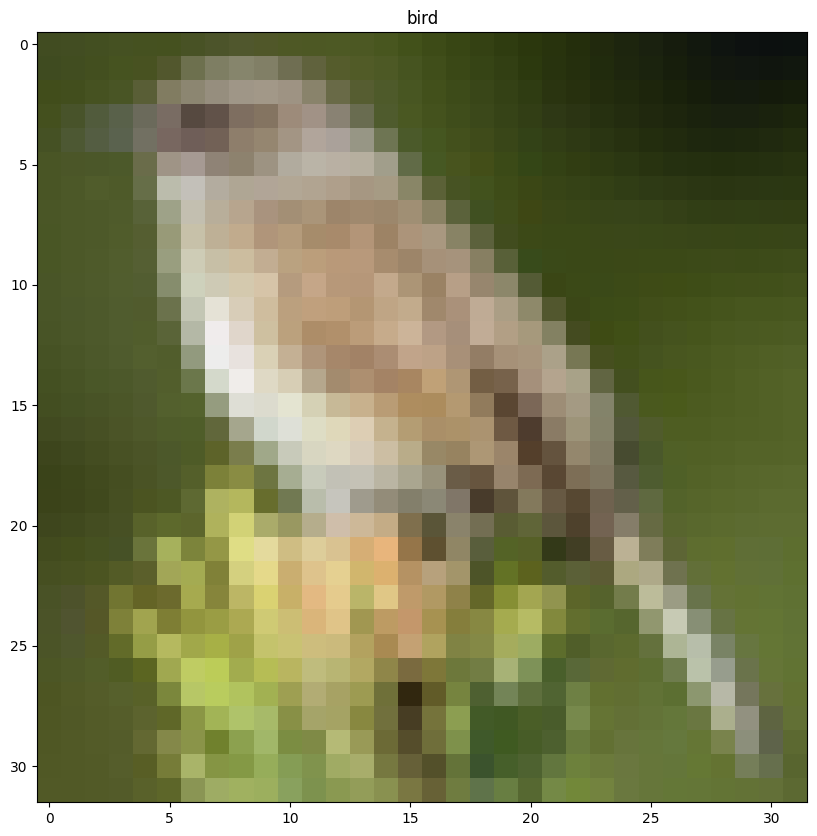

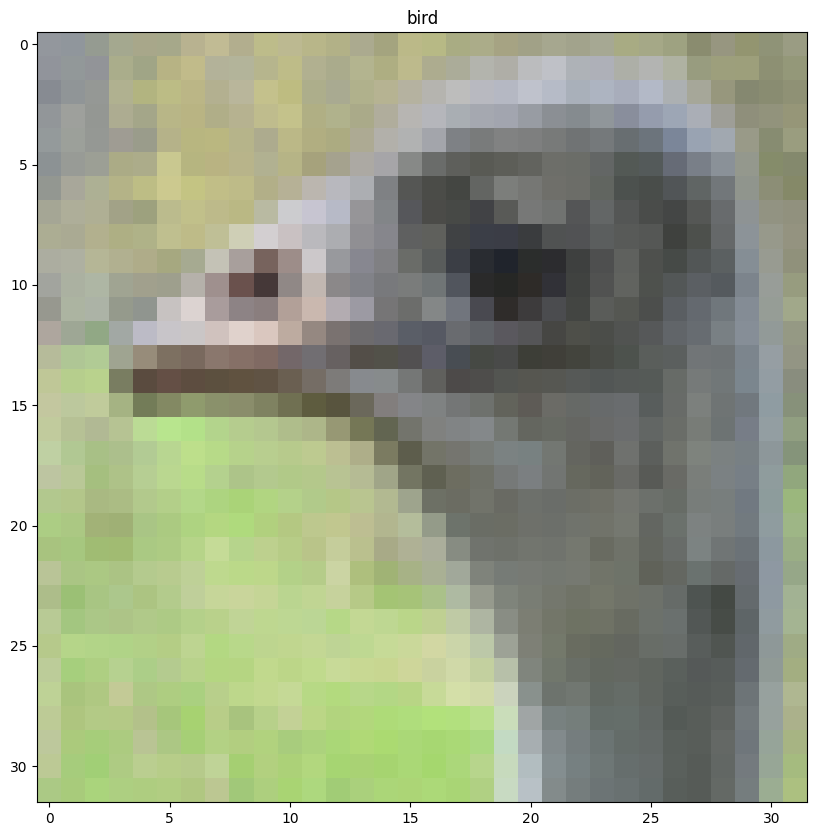

In [ ]:
# Выбор датасета (например, cifar10)
dataset, info = tfds.load('cifar10', with_info=True, as_supervised=True)
print(f"info: {info.description}")

# Получить имена классов из датасета, добавить имя для своего изображения
class_names = np.array(info.features['label'].names + ['my_image'])

# Отобразим парочку изображений из датасета
test_dataset = dataset['test'].shuffle(buffer_size=1000).take(10)
for image, label in test_dataset:
  show_image(image, class_names[label.numpy()])

N = 2048  # Возьмем только часть от датасета
dataset = dataset['train'].shuffle(buffer_size=1000).take(N)

# Подготовка данных
batch_size = 32
dataset = dataset.map(preprocess_image).batch(batch_size)


In [ ]:
features_list = []
labels_list = []

# Извлечение признаков из датасета
for idx, (images, labels) in enumerate(dataset):
    print(f'{idx + 1}/{int(N / batch_size)}')
    features = model.predict(images)
    features_list.append(features)
    labels_list.append(labels.numpy())


1/64
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step
2/64
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step
3/64
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step
4/64
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step
5/64
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step
6/64
1/1 ━━━━━━━━━━━━━━━━━━━━ 22s 22s/step
7/64
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step
8/64
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step
9/64
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step
10/64
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step
11/64
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step
12/64
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step
13/64
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step
14/64
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step
15/64
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step
16/64
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step
17/64
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step
18/64
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step
19/64
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step
20/64
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step
21/64
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step
22/64
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step
23/64
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/st

In [ ]:
# Извлечь признаки из своего изображения
my_features = model.predict(img_data)
print(f'{my_features.shape=}')

features_array = np.concatenate(features_list + [my_features], axis=0)
labels_array = np.concatenate(labels_list, axis=0)

print(f'{len(features_list)=}')
print(f'{features_list[0].shape=}')
print(f'{features_array.shape=}')
print(f'{labels_array.shape=}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step
my_features.shape=(1, 7, 7, 512)
len(features_list)=64
features_list[0].shape=(32, 7, 7, 512)
features_array.shape=(2049, 7, 7, 512)
labels_array.shape=(2048,)


Размерность features_2d: (2049, 2)
Часть features_2d: [[ 101.89273   -42.74498 ]
 [ -80.488174  -66.643394]
 [ 144.69862  -110.74663 ]
 [ -62.547417 -131.13202 ]
 [-113.20636    82.818855]]
Размерность labels_array: (2048,)
Часть labels_array: [9 1 2 8 4]
Имена классов: ['airplane' 'automobile' 'bird' 'cat' 'deer' 'dog' 'frog' 'horse' 'ship'
 'truck' 'my_image']


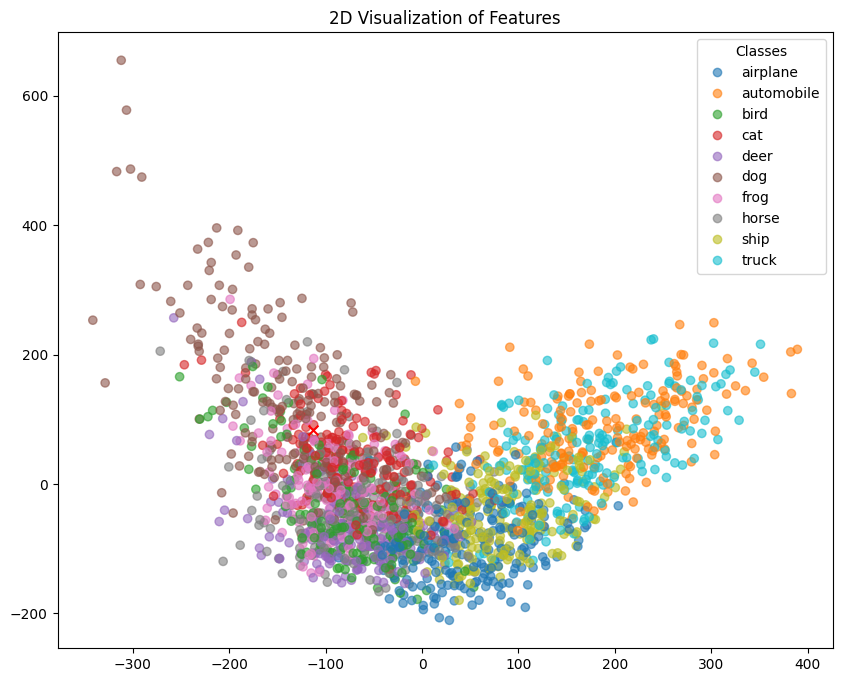

In [ ]:
# Применение PCA для уменьшения размерности до 2D
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features_array.reshape(features_array.shape[0], -1))

print(f"Размерность features_2d: {features_2d.shape}")  # (N, 2)
print(f"Часть features_2d: {features_2d[-5:]}")
print(f"Размерность labels_array: {labels_array.shape}")
print(f"Часть labels_array: {labels_array[-5:]}")
print(f"Имена классов: {class_names}")

# Визуализация
plt.figure(figsize=(10, 8))
scatter = plt.scatter(features_2d[:-1, 0], features_2d[:-1, 1], c=labels_array, cmap='tab10', alpha=0.6)
plt.scatter(features_2d[-1, 0], features_2d[-1, 1], c='red', marker='x', s=50, label='My image')  # Ваше изображение
handles, _ = scatter.legend_elements()

plt.legend(handles, class_names, title="Classes")

# Добавляем подписи к нескольким точкам (для проверки)
# for i in range(10):
#     plt.text(features_2d[i, 0], features_2d[i, 1], class_names[labels_array[i]], fontsize=9)

plt.title('2D Visualization of Features')
plt.show()